In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

from datetime import datetime, timezone, timedelta
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import platform

system = platform.system()

if system == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    !apt-get -y install fonts-nanum
    !fc-cache -fv
    !rm ~/.cache/matplotlib -rf

    plt.rcParams['font.family'] = 'NanumBarunGothic'

In [2]:
analysisdata = pd.read_json('../data/review_count_alltime.json')

In [26]:
df_user = pd.read_csv('../data/chart.csv')

In [3]:
analysisdata

,success,results,count_all_reviews,expand_graph
start_date,1,1672012800,True,False
end_date,1,1715472000,True,False
weeks,1,[],True,False
rollups,1,"[{'date': 1672012800, 'recommendations_up': 50...",True,False
rollup_type,1,week,True,False
recent,1,"[{'date': 1712966400, 'recommendations_up': 0,...",True,False


## 리뷰 카운트

In [17]:
df_recommend = pd.DataFrame(analysisdata['results']['rollups'])

In [18]:
df_recommend['date'] = pd.to_datetime(df_recommend['date'],unit='s')

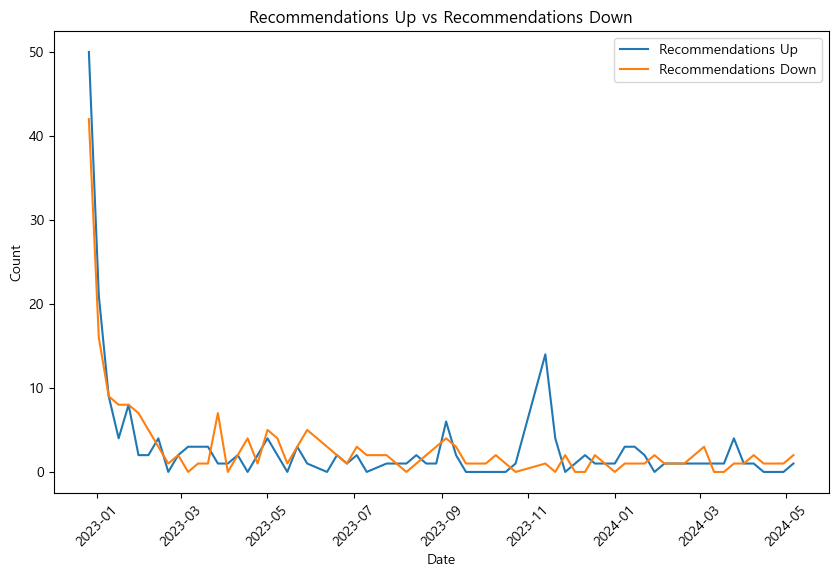

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_recommend, x='date', y='recommendations_up', label='Recommendations Up')
sns.lineplot(data=df_recommend, x='date', y='recommendations_down', label='Recommendations Down')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Recommendations Up vs Recommendations Down')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## 유저 수

In [52]:
df_user['DateTime'] = pd.to_datetime(df_user['DateTime'])

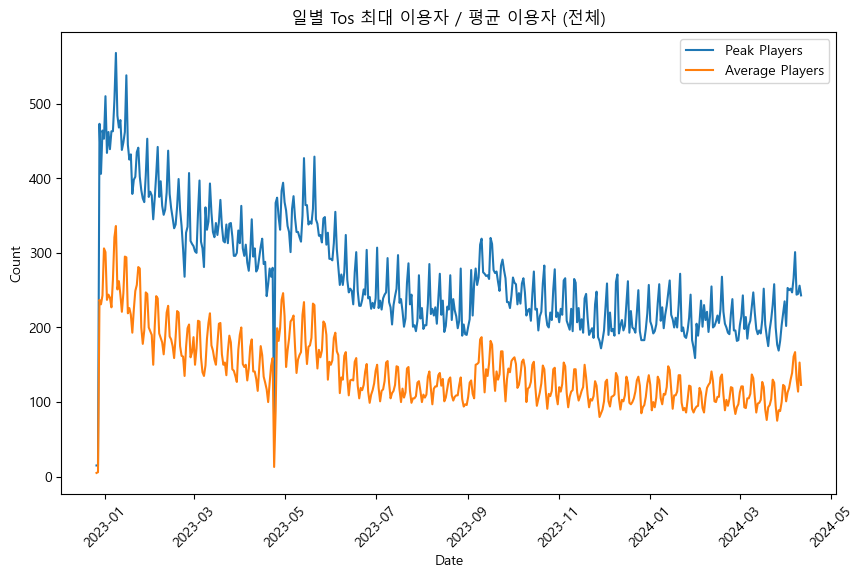

In [59]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_user.query('DateTime < "2024-04-12"'), x='DateTime', y='Players', label='Peak Players')
sns.lineplot(data=df_user.query('DateTime < "2024-04-12"'), x='DateTime', y='Average Players', label='Average Players')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('일별 Tos 최대 이용자 / 평균 이용자 (전체)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

- 2024-04-12 부터 1시간씩 있음
- 2024-05-06 부터 10분씩 있음

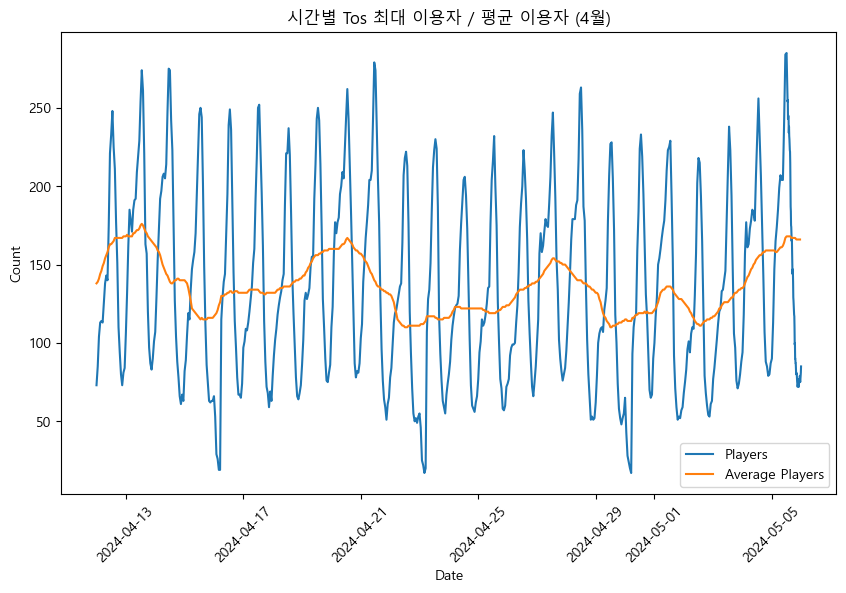

In [62]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_user.query('DateTime >= "2024-04-12" & DateTime < "2024-05-06"'), x='DateTime', y='Players', label='Players')
sns.lineplot(data=df_user.query('DateTime >= "2024-04-12" & DateTime < "2024-05-06"'), x='DateTime', y='Average Players', label='Average Players')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('시간별 Tos 최대 이용자 / 평균 이용자 (4월)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

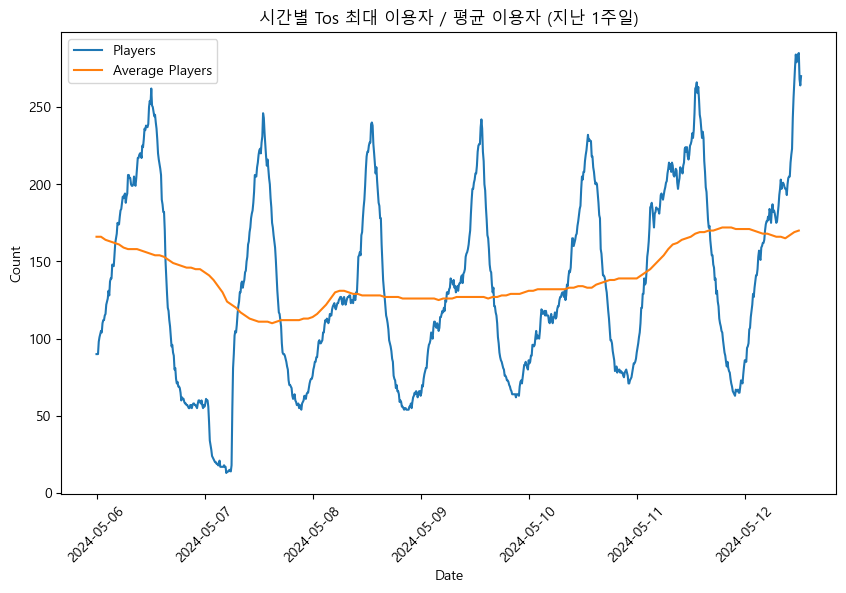

In [61]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_user.query('DateTime >= "2024-05-06"'), x='DateTime', y='Players', label='Players')
sns.lineplot(data=df_user.query('DateTime >= "2024-05-06"'), x='DateTime', y='Average Players', label='Average Players')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('시간별 Tos 최대 이용자 / 평균 이용자 (지난 1주일)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

### 예상 인원 예측
- 프로핏

In [77]:
from prophet import Prophet

model_peak = Prophet()
model_avg = Prophet()

In [78]:
fit_peak_data = pd.DataFrame()
fit_avg_data = pd.DataFrame()



fit_peak_data['ds'] = df_user.query('DateTime < "2024-04-12"')['DateTime']
fit_peak_data['y'] = df_user.query('DateTime < "2024-04-12"')['Players']

fit_avg_data['ds'] = df_user.query('DateTime < "2024-04-12"')['DateTime']
fit_avg_data['y'] = df_user.query('DateTime < "2024-04-12"')['Average Players']

In [79]:
model_peak.fit(fit_peak_data)
model_avg.fit(fit_avg_data)

10:06:27 - cmdstanpy - INFO - Chain [1] start processing


10:06:27 - cmdstanpy - INFO - Chain [1] done processing
10:06:27 - cmdstanpy - INFO - Chain [1] start processing
10:06:27 - cmdstanpy - INFO - Chain [1] done processing


In [80]:
future_dates_peak = model_peak.make_future_dataframe(periods=365)
future_dates_avg = model_avg.make_future_dataframe(periods=365)

In [81]:
forecast_peak = model_peak.predict(future_dates_peak)
forecast_avg = model_avg.predict(future_dates_avg)

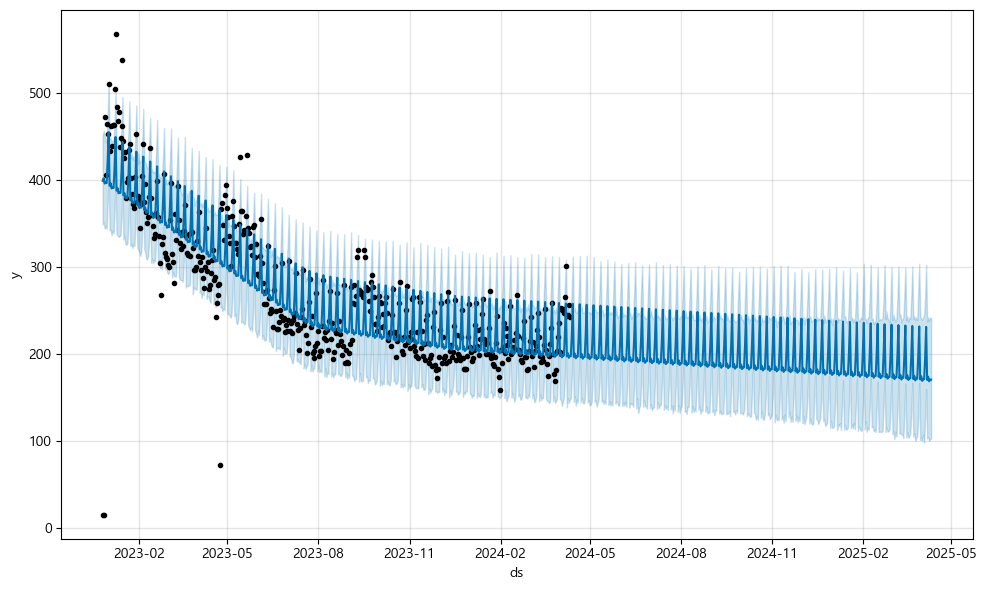

In [82]:
fig_peak = model_peak.plot(forecast_peak)

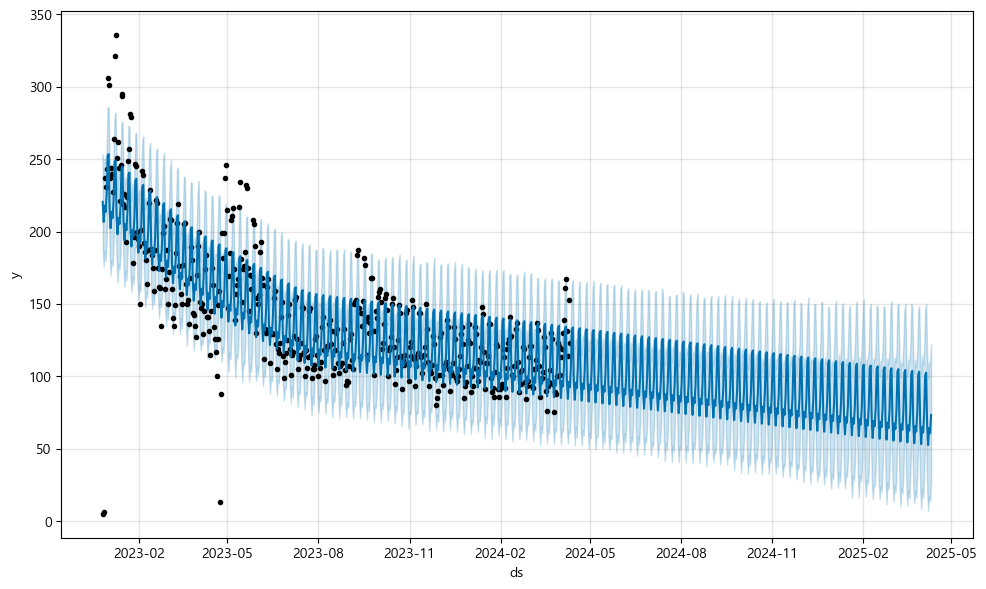

In [83]:
fig_avg = model_avg.plot(forecast_avg)

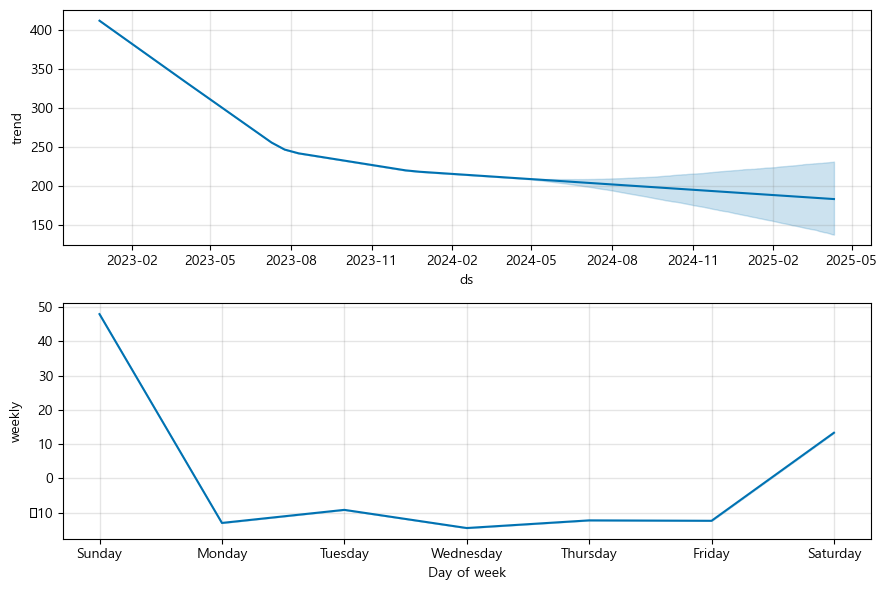

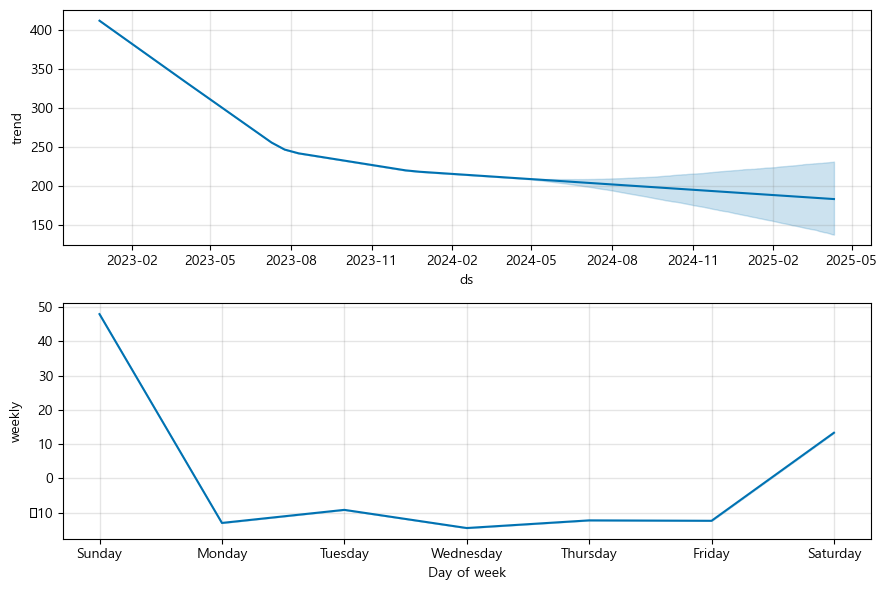

In [84]:
model_peak.plot_components(forecast_peak)

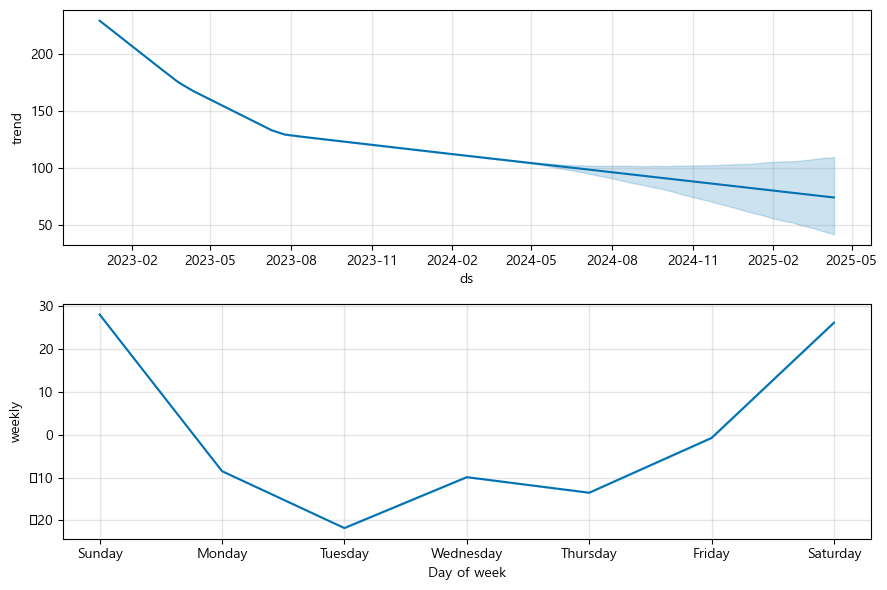

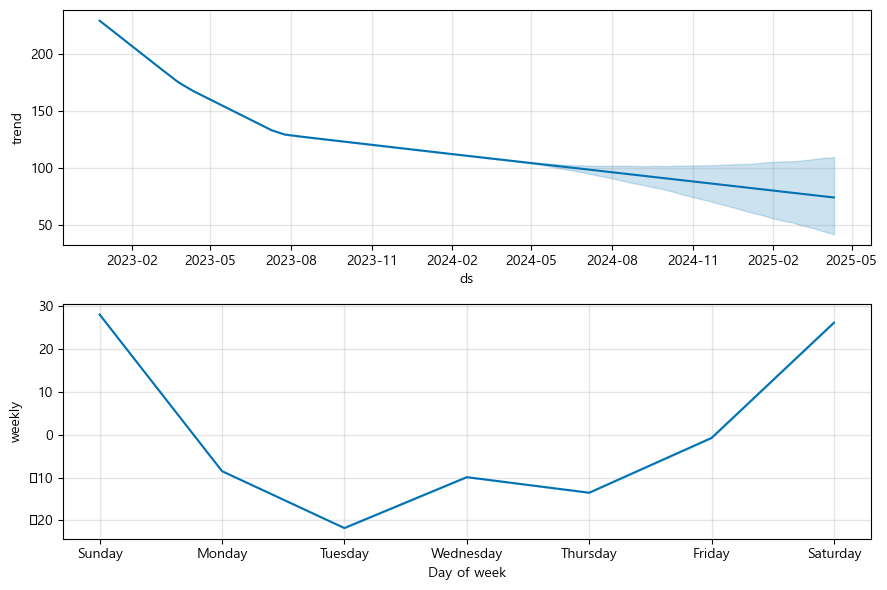

In [85]:
model_avg.plot_components(forecast_avg)